# Emerging AI Technologies - Assignment 3

#### **Names of the Group Members:**


```
1.   Samuel-Duke Chukwudi Prosper Ezeofor - 200562683
2.   Jennifer Anne Ong - 200572773
3.   Neha Dhamnani - 200547566
4.   Dev Trivedi - 200515722
5.   Andrea Percy Francis - 200555646

```

## Header

*Explain your project, the strategy, the intended audience, the challenges, and the instructions to construct a pipeline (if any).*

**Project**
The project aims to predict whether people who've previously donated blood are likely to return to donate blood at a future date. This is important because blood is sued in may serious medical procedures and could be the factor between life or death for a patient.

**Strategy**
Using machine learning models used in previous researches as well as those recommended by AutoML, the team will attempt to make predictions of whether blood donors are likely to return and participate in blood drives.

**Intended audience**
The intended audience includes professionals in the health care industry particularly those in charge of running blood donation drives, clinics, NGOs that run similar activities.

**Challenges**
Blood donation drives usually have issues in getting previous donors to donate again. These issues have multiple causes: Cultural, religious, personal beliefs, mental and the inconvenience of donating blood. Datasets from different countries will look different due to these issues, consequently, the behaviour of the models will be different as well.  

**Pipeline instructions**
- Data cleaning  and preprocessing:
    There were no missing or duplicate values in the dataset and all the entries were already of the integer datatype. The dataset also contained no imbalances.

- Data preparation:
    The data was split into training and testing sets, 75% for the training set and 25% for the test set. The column "monetary" which contained the volume of blood donated was skewed so it had to be normalised.
    
- Model selection:
    We tested the models that were used in the research papers that we reviewed; BernoulliNB, SVM, Decision Trees and ANN for their accuracies on our dataset. Out of the four SVM performed best with an accuracy of 77.54%.
    Then we implemented TPOT autoML and got the Best pipeline: LogisticRegression(RobustScaler(input_matrix), C=25.0, dual=False, penalty=l2) which had an accuracy of 78.57%.
    Using this best pipeline suggestion from TPOT, we implemented our own Logistic regression model and got an accuracy score of 78.9%

**The Data**
The dataset we will be working on is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different places and collects blood as part of a blood drive. The dataset includes the recency (how recent the person's last blood donation was), frequency (how many times the person has donated blood), monetary (the volume of blood donated), the time (the duration from the first time they donated to the last time they donated), and whether or not they donated in March 2007.
The last column will serve as the target.
    

## Problem Statement

Blood donation drives are an essential activity to acquire blood as a raw material into the blood supply chain. It is significantly difficult for medical practitioners to guarantee that there is an adequate supply of blood when needed for treating numerous illnesses and blood problems, and to restore blood lost during major surgery or a traumatic injury. It must be managed effectively together with other processes in blood management which should direct donors to suitable days and avoid shortage and wastage of blood units. In this experiment, our goal is to predict if a donor will donate blood again in the future. <br><br>
The dataset we will be working on is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different places and collects blood as part of a blood drive. 

## Python Code

In [1]:
pip install tpot

Note: you may need to restart the kernel to use updated packages.


### EDA

In [2]:
import pandas as pd

transfusion = pd.read_csv('/Users/andreapercy/Downloads/transfusion.data')

transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
transfusion.rename(
    columns={'whether he/she donated blood in March 2007': 'target'},
    inplace=True
)

transfusion.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1


In [5]:
transfusion.target.value_counts(normalize=True).round(3)

target
0    0.762
1    0.238
Name: proportion, dtype: float64

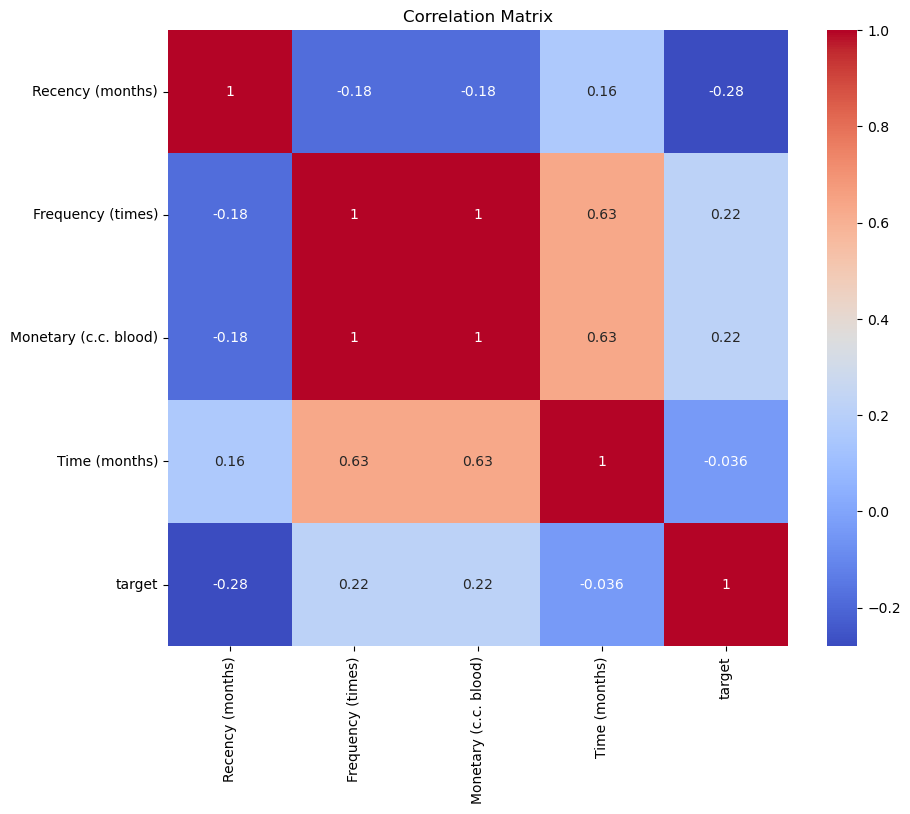

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = transfusion.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



### Splitting the data

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    transfusion.drop(columns='target'),
    transfusion.target,
    test_size=0.25,
    random_state=42,
    stratify=transfusion.target
)

X_train.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
334,16,2,500,16
99,5,7,1750,26


In [8]:
X_train.var().round(3)

Recency (months)              66.929
Frequency (times)             33.830
Monetary (c.c. blood)    2114363.700
Time (months)                611.147
dtype: float64

In [9]:
import numpy as np

X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

col_to_normalize = 'Monetary (c.c. blood)'

# Log normalization
for df_ in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Drop the original column
    df_.drop(columns=col_to_normalize, inplace=True)

# Check the variance for X_train_normed
X_train_normed.var().round(3)

Recency (months)      66.929
Frequency (times)     33.830
Time (months)        611.147
monetary_log           0.837
dtype: float64

### Models used by other researchers

#### BernoulliNB

In [16]:
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.naive_bayes import BernoulliNB

BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=0.1)
0.7647058823529411


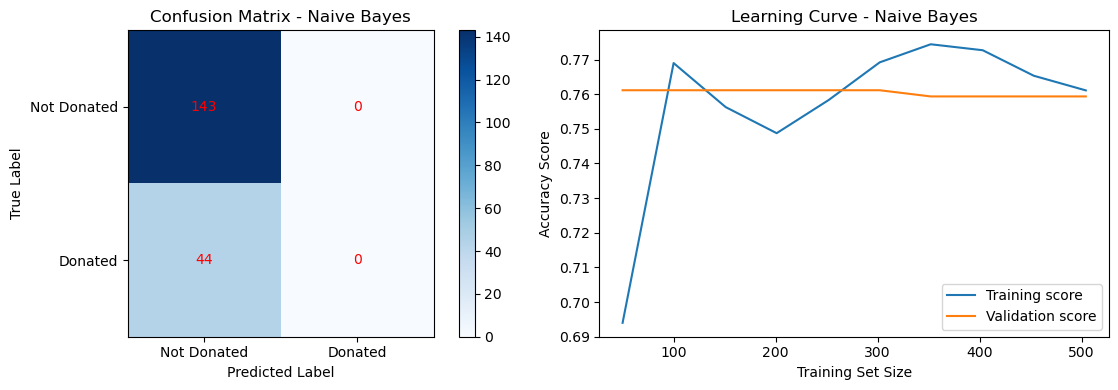

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve

# Make predictions on the testing data using Naive Bayes
y_pred_NB = BernNB.predict(X_test)

# Calculate the confusion matrix for Naive Bayes
cm_NB = confusion_matrix(y_test, y_pred_NB)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Naive Bayes Confusion Matrix
axes[0].imshow(cm_NB, interpolation='nearest', cmap=plt.cm.Blues)
for i in range(cm_NB.shape[0]):
    for j in range(cm_NB.shape[1]):
        axes[0].text(j, i, cm_NB[i, j], ha='center', va='center', color='red')
axes[0].set_title('Confusion Matrix - Naive Bayes')
fig.colorbar(axes[0].imshow(cm_NB, interpolation='nearest', cmap=plt.cm.Blues))
tick_marks = np.arange(2)
axes[0].set_xticks(tick_marks, ['Not Donated', 'Donated'])
axes[0].set_yticks(tick_marks, ['Not Donated', 'Donated'])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=BernNB,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=-1
)
axes[1].plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
axes[1].plot(train_sizes, np.mean(test_scores, axis=1), label='Validation score')
axes[1].set_title('Learning Curve - Naive Bayes')
axes[1].set_xlabel('Training Set Size')
axes[1].set_ylabel('Accuracy Score')
axes[1].legend(loc='best')

# Show the subplots
plt.tight_layout()
plt.show()


BernoulliNB was chosen compared to other NB models because it scored best. In this case, BernoulliNB scored 76.47%.

#### SVM

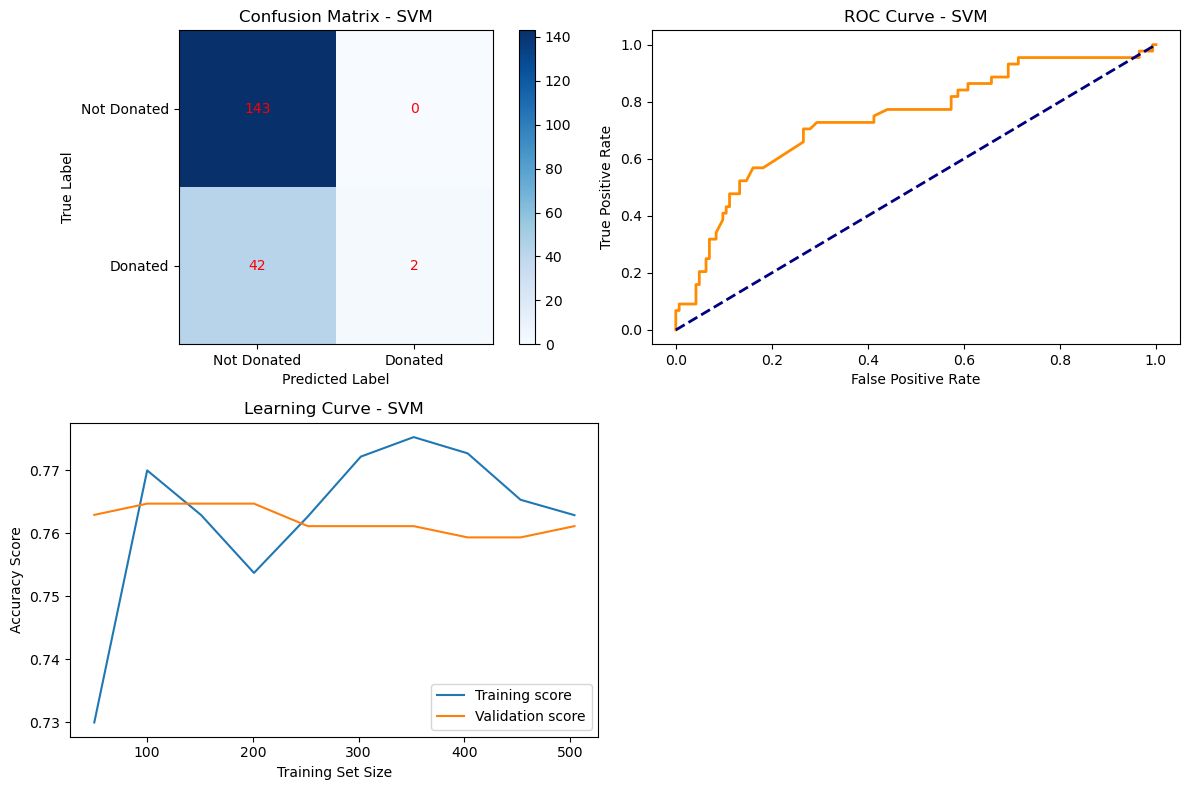

In [16]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

classifier = svm.SVC(kernel='poly')
classifier.fit(X_train, y_train)
pred_SVM = classifier.predict(X_test)
accuracy_score(y_test, pred_SVM)
cm_SVM = confusion_matrix(y_test, pred_SVM)

# SVM Confusion Matrix
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(cm_SVM ,  cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.colorbar() 
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Donated', 'Donated'])
plt.yticks(tick_marks, ['Not Donated', 'Donated'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(cm_SVM.shape[0]):
    for j in range(cm_SVM.shape[1]):
        plt.text(j, i, cm_SVM[i, j], ha='center', va='center', color='red')

# ROC Curve
plt.subplot(2, 2, 2)
y_pred_proba_SVM = classifier.decision_function(X_test)
fpr_SVM, tpr_SVM, _ = roc_curve(y_test, y_pred_proba_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
plt.plot(fpr_SVM, tpr_SVM, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_SVM:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=classifier,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=-1
)
plt.subplot(2, 2, 3)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation score')
plt.title('Learning Curve - SVM')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

plt.tight_layout()
plt.show()





For SVM, we tried other kernels, but the poly kernel scored best. This SVM model scored 77.54%, which is higher than BernoulliNB.

#### Decision Tree

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/4327800/a59c0b95-f1b9-40a3-97eb-c430a298ac8d/transfusion.data"
df = pd.read_csv('transfusion.data')

# Split the dataset into features and target variable
X = df.drop(columns=['whether he/she donated blood in March 2007'])
y = df['whether he/she donated blood in March 2007']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
print(f"Decision Tree Accuracy Score: {accuracy_score(y_test, y_pred)}")


Decision Tree Accuracy Score: 0.64


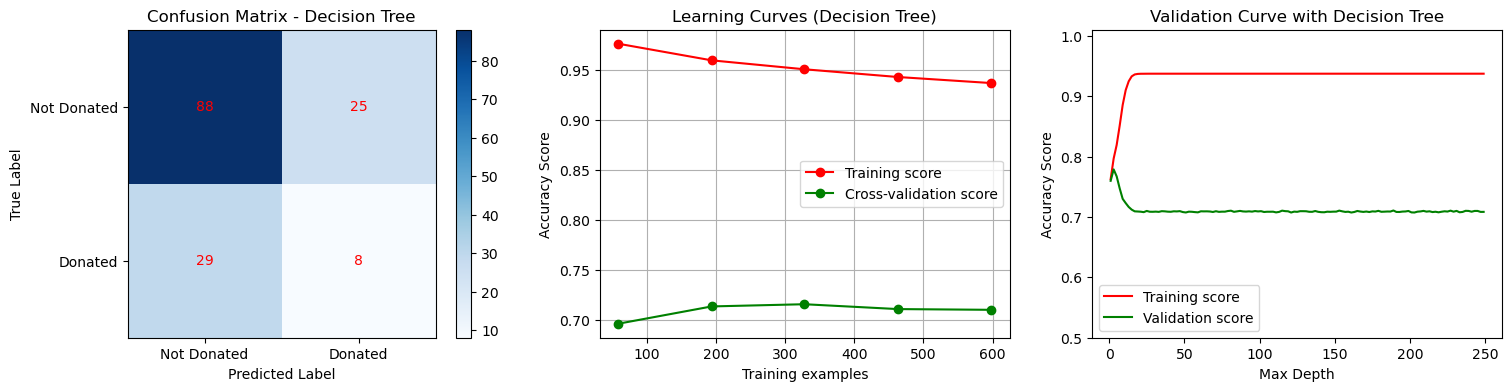

In [18]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import ShuffleSplit, validation_curve, learning_curve
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Decision Tree Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

y_pred_DT = clf.predict(X_test)
cm_DT = confusion_matrix(y_test, y_pred_DT)

axes[0].imshow(cm_DT, interpolation='nearest', cmap=plt.cm.Blues)
for i in range(cm_DT.shape[0]):
    for j in range(cm_DT.shape[1]):
        axes[0].text(j, i, cm_DT[i, j], ha='center', va='center', color='red')

axes[0].set_title('Confusion Matrix - Decision Tree')
fig.colorbar(axes[0].imshow(cm_DT, interpolation='nearest', cmap=plt.cm.Blues))
tick_marks = np.arange(2)
axes[0].set_xticks(tick_marks, ['Not Donated', 'Donated'])
axes[0].set_yticks(tick_marks, ['Not Donated', 'Donated'])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Learning Curve
title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier()
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=4)
axes[1].set_title(title)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("Accuracy Score")
axes[1].grid()
axes[1].plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
axes[1].plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
axes[1].legend(loc="best")

# Validation Curve
param_range = np.arange(1, 250, 2)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=param_range,
    scoring="accuracy", cv=cv, n_jobs=4)

axes[2].set_title("Validation Curve with Decision Tree")
axes[2].set_xlabel("Max Depth")
axes[2].set_ylabel("Accuracy Score")
axes[2].set_ylim(0.5, 1.01)
axes[2].plot(param_range, np.mean(train_scores, axis=1), label="Training score", color="r")
axes[2].plot(param_range, np.mean(test_scores, axis=1), label="Validation score", color="g")
axes[2].legend(loc="best")

# Show the plots
plt.show()

Decision Tree scored the lowest out of all the machine learning models the researchers used, with only 64.66%.

#### ANN

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
url = "https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/4327800/a59c0b95-f1b9-40a3-97eb-c430a298ac8d/transfusion.data"
df = pd.read_csv('transfusion.data')

# Split the dataset into features and target variable
X = df.drop(columns=['whether he/she donated blood in March 2007'])
y = df['whether he/she donated blood in March 2007']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=150, batch_size=10)

# Evaluate the model on the testing data
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))



Epoch 1/150
60/60 [==============================] - 0s 694us/step - loss: 0.7567 - accuracy: 0.3963
Epoch 2/150
60/60 [==============================] - 0s 597us/step - loss: 0.6225 - accuracy: 0.7274
Epoch 3/150
60/60 [==============================] - 0s 561us/step - loss: 0.5512 - accuracy: 0.7759
Epoch 4/150
60/60 [==============================] - 0s 584us/step - loss: 0.5169 - accuracy: 0.7776
Epoch 5/150
60/60 [==============================] - 0s 578us/step - loss: 0.4981 - accuracy: 0.7809
Epoch 6/150
60/60 [==============================] - 0s 578us/step - loss: 0.4832 - accuracy: 0.7843
Epoch 7/150
60/60 [==============================] - 0s 703us/step - loss: 0.4729 - accuracy: 0.7876
Epoch 8/150
60/60 [==============================] - 0s 616us/step - loss: 0.4664 - accuracy: 0.7893
Epoch 9/150
60/60 [==============================] - 0s 682us/step - loss: 0.4624 - accuracy: 0.7943
Epoch 10/150
60/60 [==============================] - 0s 772us/step - loss: 0.4590 - accura

5/5 [==============================] - 0s 718us/step


5/5 [==============================] - 0s 744us/step


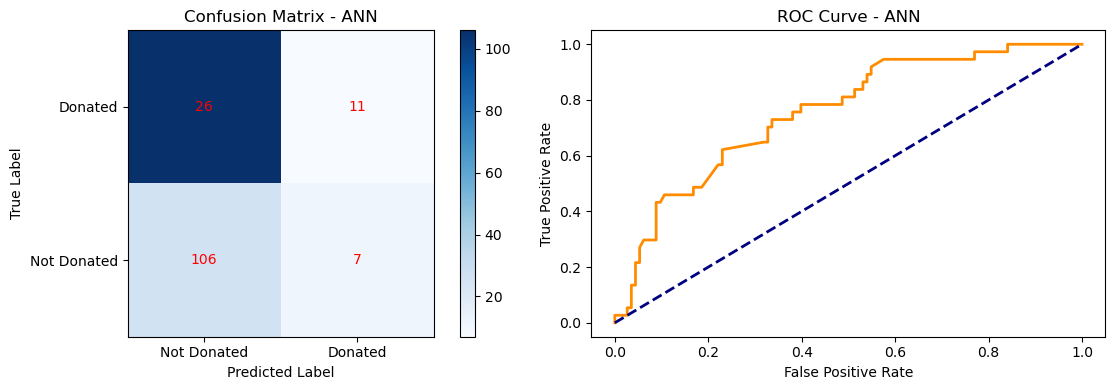

In [21]:
# Visualisation
# Confusion Matrix
y_pred_ANN = (model.predict(X_test) > 0.5).astype("int32")
cm_ANN = confusion_matrix(y_test, y_pred_ANN)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cm_ANN, interpolation='nearest', cmap=plt.cm.Blues, extent=[-0.5, 1.5, -0.5, 1.5])
for i in range(cm_ANN.shape[0]):
    for j in range(cm_ANN.shape[1]):
        plt.text(j, i, cm_ANN[i, j], ha='center', va='center', color='red')

plt.title('Confusion Matrix - ANN')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Donated', 'Donated'])
plt.yticks(tick_marks, ['Not Donated', 'Donated'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ANN ROC Curve
plt.subplot(1, 2, 2)
y_pred_proba_ANN = model.predict(X_test)
fpr_ANN, tpr_ANN, _ = roc_curve(y_test, y_pred_proba_ANN)
roc_auc_ANN = auc(fpr_ANN, tpr_ANN)
plt.plot(fpr_ANN, tpr_ANN, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_ANN:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN')
plt.tight_layout()
plt.show()


ANN scored fairly well at 76.67%, although not as good as SVM.

### Model suggested by TPOT

#### TPOT (Logistic Regression + RobustScaler)

In [14]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')




/Users/andreapercy/anaconda3/lib/python3.11/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7422459184429089

Generation 2 - Current best internal CV score: 0.7422459184429089

Generation 3 - Current best internal CV score: 0.7423330644124078

Generation 4 - Current best internal CV score: 0.7423330644124078

Generation 5 - Current best internal CV score: 0.7423330644124078

Best pipeline: LogisticRegression(RobustScaler(input_matrix), C=25.0, dual=False, penalty=l2)

AUC score: 0.7858

Best pipeline steps:
1. RobustScaler()
2. LogisticRegression(C=25.0, random_state=42)


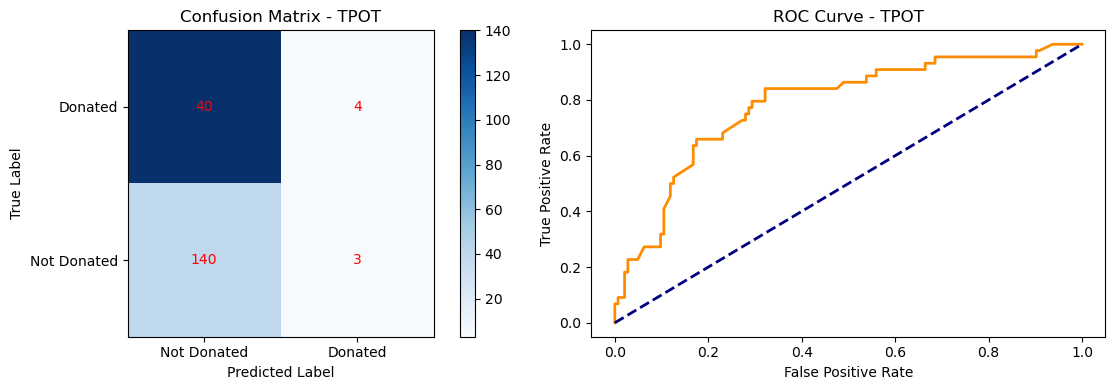

In [15]:
# Visualisation

# Confusion Matrix
y_pred_tpot = tpot.predict(X_test)
cm_tpot = confusion_matrix(y_test, y_pred_tpot)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cm_tpot, interpolation='nearest', cmap=plt.cm.Blues, extent=[-0.5, 1.5, -0.5, 1.5])
for i in range(cm_tpot.shape[0]):
    for j in range(cm_tpot.shape[1]):
        plt.text(j, i, cm_tpot[i, j], ha='center', va='center', color='red')

plt.title('Confusion Matrix - TPOT')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Donated', 'Donated'])
plt.yticks(tick_marks, ['Not Donated', 'Donated'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# TPOT ROC Curve
plt.subplot(1, 2, 2)
y_pred_proba_tpot = tpot.predict_proba(X_test)
fpr_tpot, tpr_tpot, _ = roc_curve(y_test, y_pred_proba_tpot[:, 1])
roc_auc_tpot = auc(fpr_tpot, tpr_tpot)
plt.plot(fpr_tpot, tpr_tpot, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_tpot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - TPOT')
plt.tight_layout()
plt.show()


TPOT achieved a higher AUC score than the models used by the researchers, with a score of 78.58%.

### Using our own model based on TPOT suggestion

#### Logistic Regression

In [10]:
from sklearn import linear_model

from sklearn.metrics import roc_auc_score
# Instantiate LogisticRegression
logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42
)


# Train the model
logreg.fit(X_train_normed, y_train)

logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')



AUC score: 0.7891


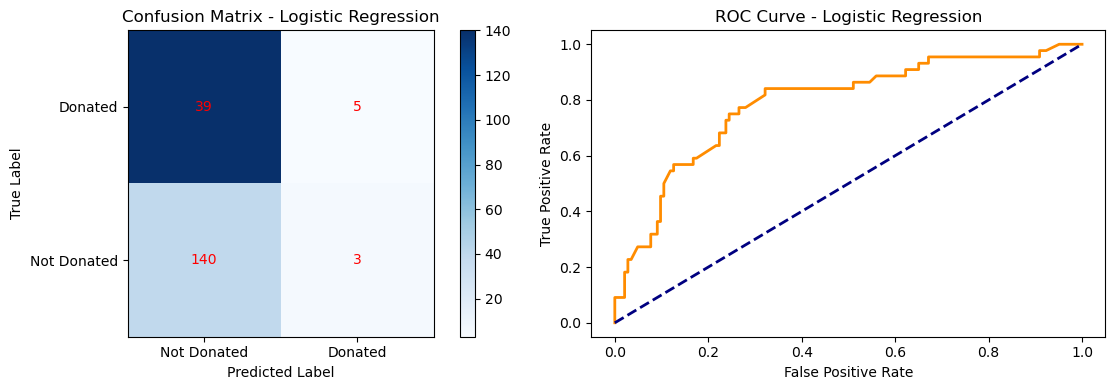

In [13]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
y_pred_LR = logreg.predict(X_test_normed)
cm_LR = confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cm_LR, interpolation='nearest', cmap=plt.cm.Blues, extent=[-0.5, 1.5, -0.5, 1.5])
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Donated', 'Donated'])
plt.yticks(tick_marks, ['Not Donated', 'Donated'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm_LR.max() / 2
for i in range(cm_LR.shape[0]):
    for j in range(cm_LR.shape[1]):
        plt.text(j, i, format(cm_LR[i, j], 'd'), ha="center", va="center",
                 color="red")

# Logistic Regression ROC Curve
plt.subplot(1, 2, 2)
y_pred_proba_LR = logreg.predict_proba(X_test_normed)
fpr_LR, tpr_LR, _ = roc_curve(y_test, y_pred_proba_LR[:, 1])
roc_auc_LR = auc(fpr_LR, tpr_LR)
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_LR:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.tight_layout()


Overall, Logistic Regression performed the best out of all the models we have tried with this dataset. Logistic Regression alone without the Robust Scaler did slightly better than the suggested pipeline by TPOT. It shows that TPOT can serve as a good guide towards choosing the best model to use but it is still ultimately better to create a model on your own as you can customize it according to your dataset and what you want to achieve.

## Machine Learning Prediction and Outcomes
*Did the prediction match with expectation using your designated AutoML? What were the results? This can be a combination of text or commenting on the code. How does your work match with the research papers that you selected? How did this fair against the prototype you created in assignment 2?*


- The research papers we studied had carried out the analysis of predicting potential blood donors using SVM, Artificial Neural Network (ANN), Decision Tree and  Bayesian model. The classification of potential/non-potential donors aims to predict how many donors will attend and donate blood. The authors have used the above stated models because Support Vector Machine (SVM) is a method of pattern recognition that has received a lot of attention. ANN is a technique of data mining that is used to predict or classify data in the domain of ideas or feelings and behaviors of consumers effectively. Both ANN and Decision Trees models help in learning patterns of the data to solve the problem of classification and clustering.
- The Bayesian approach helps to explain donor's behaviour based on their individual characteristics, and under this approach all the parameters of likelihood are random. According to the results published in the papers with all these approches SVM suggested that 85% of the predicted potential donors came and made a donation, for ANN the authors have claimed to achieve the accuracy of over 75% in prediction which was better than Decision trees. The research papers had very detailed explanation of the problem which they have addressed solving different ML classfication and clustering techniques. The approach taken provided various insights about the data as well as the prediction results were quite convincing as they acheived the required goal.
- The logistic regression model did slightly better on our dataset than the models used in the research papers.

## Visualisation and Documentation

- The results were visualised using different graphs from matplotlib: Confusion matrix to compare the models used by the reserch papers and the model suggested by TPOT.
- It would be difficult for an executive to interpret the results and graphs alone, a data analyst or scientist will be neccessary to interpret the results.
- Blood-Donation-Prediction: https://github.com/gauravabhishek4U/Predict-Blood-Donations 
- Other articles that support our idea are listed in the references.

## Trailer

*What's the conceptual enhancement that your solution can leverage (between Quantum Computing or AGI)? Why?*

1. **Predictive Analytics for Blood Demand:** AGI can analyze historical data and use predictive analytics to forecast the demand  for blood in specific regions and time frames. This helps blood banks anticipate shortages and plan targeted donation campaigns to meet future needs.

2. **Automated Scheduling and Reminders:** AGI-powered systems can facilitate the scheduling of blood donation appointments by considering factors like donor availability, location, and historical donation patterns. Automated reminders can be sent to donors to reduce the likelihood of missed appointments.

3. **Personalized Donor Engagement:** AGI can analyze donor data to create personalized engagement strategies. This may involve tailoring communication to individual preferences, providing relevant information about the impact of donations, and offering incentives to encourage regular donations.

4. **Automated Documentation and Reporting:** AGI can streamline the documentation and reporting processes associated with blood donation. This includes automating the entry of donor information, tracking donation history, and generating reports for regulatory compliance and quality control.

<br>

*What did you learn, how else would you improve the code or visualization? Final remarks from each group member.*<br><br>
Visualizations could be improved with the use of tools such as Power BI. The visualization should be put into a more user-friendly dashboard so that those who don't understand how to use Jupyter Notebook can easily access and understand the information. We can also use standardization techniques to be applied to the final model and see if the accuracy improves.<br><br>
#### Final Remarks <br>
- **Andrea:** Auto ML creates machine learning models more quickly by utilising state-of-the-art technology. Through the automation of certain processes related to the development, training, and application of machine learning models, its innovative approach opens up the usage of these models to a broader range of users with varying levels of expertise.

- **Dev:** This was a great experience for all of us to understand how things work in real world based on AutoML Tools & Visualization

- **Jennifer:** AutoML tools should be used more as a guide to lessen the time it takes to choose the appropriate model for the dataset.

- **Neha:** This was a good learning to explore Auto-ML tools and test a use case which has real world implications.

- **Samuel-Duke:** AutoML makes machine learning accessible to individuals with varying expertise, it allows for rapid experimentation making processes like this more efficient.




## **References**

- Handojo, A. et al. (2022). Predicting potential blood donors who can attend blood donation ... Predicting Potential Blood Donors Who Can Attend Blood Donation Activities using a Support Vector Machine. https://repository.petra.ac.id/20272/1/Publikasi1_00016_9117.pdf 
- Boonyanusith, W and Jittamai, P. (2012). Blood donor classification using neural network and decision tree. https://www.iaeng.org/publication/WCECS2012/WCECS2012_pp499-503.pdf 
- Epifani, I., Lanzarone, E., &amp; Guglielmi, A. (2023). Predicting donations and profiling donors in a blood collection center: A bayesian approach - flexible services and Manufacturing Journal. SpringerLink. https://link.springer.com/article/10.1007/s10696-023-09516-8 
- Yeh,I-Cheng. (2008). Blood Transfusion Service Center. UCI Machine Learning Repository. https://doi.org/10.24432/C5GS39.
- Bosnes, V. et al. (2005). Predicting blood donor arrival. National Library of Medicine. https://pubmed.ncbi.nlm.nih.gov/15660823/